# Installing Libraries

In [1]:
!pip install -q pandas numpy scikit-learn nltk

In [2]:
!pip install -q tensorflow==2.15 transformers==4.36

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 96.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 78.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have trans

In [3]:
import tensorflow as tf
import transformers

print("TensorFlow version:", tf.__version__)
print("Transformers version:", transformers.__version__)

TensorFlow version: 2.15.0
Transformers version: 4.36.0


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


# Data Cleaning and Loading

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Load the dataset
df = pd.read_csv("/kaggle/input/majorp/movie.csv")

# Display dataset sample
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
# Define function to clean text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning function
df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Display cleaned text
df.head()

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbirds mates scho...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...


In [7]:
# Tokenizer settings
MAX_VOCAB = 10000  # Vocabulary size
MAX_LENGTH = 100  # Max words per review

# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['clean_text'])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Convert labels to NumPy array
y = np.array(df['label'])

# First, split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

# Now, split train into train (80% of original train) and validation (20% of original train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Final dataset sizes:
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (25600, 100), Validation: (6400, 100), Test: (8000, 100)


# Model Saving

In [9]:
import os
from tensorflow.keras.models import save_model
from tensorflow.keras.regularizers import l2

# Create a directory to store models
os.makedirs("flatten_models", exist_ok=True)

for i in range(50):
    print(f"Training Flatten Model {i+1}/50")
    
    # Define and train the model (your existing code)
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=100),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=0)
    
    # Save the model to disk (HDF5 format)
    save_model(model, f"flatten_models/flatten_model_{i}.h5")  # Saves architecture + weights
    
    print(f"Model {i+1} saved. Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

import shutil

# Compress the folder
shutil.make_archive("flatten_models_archive", 'zip', "flatten_models")

# Download the zip file (in Kaggle)
from IPython.display import FileLink
FileLink("flatten_models_archive.zip")  # Click to download

Training Flatten Model 1/50


<ipython-input-9-93b8c2ef0c82>:23: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f"flatten_models/flatten_model_{i}.h5")  # Saves architecture + weights


Model 1 saved. Val Accuracy: 0.8388
Training Flatten Model 2/50
Model 2 saved. Val Accuracy: 0.8419
Training Flatten Model 3/50
Model 3 saved. Val Accuracy: 0.8430
Training Flatten Model 4/50
Model 4 saved. Val Accuracy: 0.8377
Training Flatten Model 5/50
Model 5 saved. Val Accuracy: 0.8361
Training Flatten Model 6/50
Model 6 saved. Val Accuracy: 0.8472
Training Flatten Model 7/50
Model 7 saved. Val Accuracy: 0.8400
Training Flatten Model 8/50
Model 8 saved. Val Accuracy: 0.8398
Training Flatten Model 9/50
Model 9 saved. Val Accuracy: 0.8320
Training Flatten Model 10/50
Model 10 saved. Val Accuracy: 0.8450
Training Flatten Model 11/50
Model 11 saved. Val Accuracy: 0.8377
Training Flatten Model 12/50
Model 12 saved. Val Accuracy: 0.8358
Training Flatten Model 13/50
Model 13 saved. Val Accuracy: 0.8383
Training Flatten Model 14/50
Model 14 saved. Val Accuracy: 0.8420
Training Flatten Model 15/50
Model 15 saved. Val Accuracy: 0.8434
Training Flatten Model 16/50
Model 16 saved. Val Accurac

/kaggle/working/flatten_models_archive.zip

In [9]:
import os
import shutil
from tensorflow.keras.models import save_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Create directory for saving models
os.makedirs("lstm_models", exist_ok=True)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)

for i in range(50):
    print(f"Training LSTM Model {i+1}/50")

    # Define Model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=100),
        LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3),
        LayerNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile and Train
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, 
                        validation_data=(X_val, y_val), 
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Save Immediately After Training
    save_model(model, f"lstm_models/lstm_model_{i}.h5")  
    
    print(f"Model {i+1} saved. Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Compress all models for download
shutil.make_archive("lstm_models_archive", 'zip', "lstm_models")

# Download link
from IPython.display import FileLink
FileLink("lstm_models_archive.zip")

Training LSTM Model 1/50
Epoch 1/10
200/200 [==============================] - 47s 211ms/step - loss: 0.6100 - accuracy: 0.6356 - val_loss: 0.3939 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.3400 - accuracy: 0.8704
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
200/200 [==============================] - 35s 176ms/step - loss: 0.3400 - accuracy: 0.8704 - val_loss: 0.4169 - val_accuracy: 0.8495 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - 35s 176ms/step - loss: 0.2333 - accuracy: 0.9176 - val_loss: 0.3647 - val_accuracy: 0.8533 - lr: 5.0000e-04
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1883 - accuracy: 0.9364
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
200/200 [==============================] - 33s 163ms/step - loss: 0.1883 - accuracy: 0.9364 - val_loss: 0.3998 - val_accuracy: 0.8536 - lr: 5.0000e-04
Epoch 5/10
20

<ipython-input-9-abf79c04b44a>:35: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f"lstm_models/lstm_model_{i}.h5")


Epoch 1/10
200/200 [==============================] - 47s 222ms/step - loss: 0.6634 - accuracy: 0.5691 - val_loss: 0.4632 - val_accuracy: 0.7966 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - 37s 185ms/step - loss: 0.3758 - accuracy: 0.8552 - val_loss: 0.3506 - val_accuracy: 0.8495 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.2722 - accuracy: 0.9020
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
200/200 [==============================] - 33s 163ms/step - loss: 0.2722 - accuracy: 0.9020 - val_loss: 0.3817 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9374
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
200/200 [==============================] - 34s 168ms/step - loss: 0.1843 - accuracy: 0.9374 - val_loss: 0.3939 - val_accuracy: 0.8521 - lr: 5.0000e-04
Model 2 saved. Val Accuracy: 0.8521
Traini

/kaggle/working/lstm_models_archive.zip

In [10]:
import os
import shutil
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Create directory for saving models
os.makedirs("gru_models", exist_ok=True)

# Optimized callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=1, min_lr=1e-5, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

for i in range(50):
    print(f"Training GRU Model {i+1}/50")

    # Optimized GRU Model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=256, input_length=100, mask_zero=True),
        Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001), recurrent_dropout=0.1)),
        Bidirectional(GRU(128, return_sequences=False, kernel_regularizer=l2(0.001), recurrent_dropout=0.1)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile with optimized learning rate
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train with efficient settings
    history = model.fit(X_train, y_train, epochs=20, batch_size=512,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, reduce_lr, model_checkpoint],
                        verbose=1)

    # Save the model immediately after training
    save_model(model, f"gru_models/gru_model_{i}.h5")

    print(f"Model {i+1} saved. Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

# Compress all models for download
shutil.make_archive("gru_models_archive", 'zip', "gru_models")

# Provide download link
from IPython.display import FileLink
FileLink("gru_models_archive.zip")

Training GRU Model 1/50
Epoch 1/20
50/50 [==============================] - 40s 670ms/step - loss: 1.3704 - accuracy: 0.6489 - val_loss: 0.7175 - val_accuracy: 0.8239 - lr: 0.0010
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 31s 615ms/step - loss: 0.4937 - accuracy: 0.8766 - val_loss: 0.4592 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.9198
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 [==============================] - 31s 623ms/step - loss: 0.2960 - accuracy: 0.9198 - val_loss: 0.4609 - val_accuracy: 0.8453 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - ETA: 0s - loss: 0.2043 - accuracy: 0.9487
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
50/50 [==============================] - 30s 604ms/step - loss: 0.2043 - accuracy: 0.9487 - val_loss: 0.4856 - val_accuracy: 0.8436 - lr: 5.0000e-04
Epoch 5/20
50/50 [==============================] - ETA: 0s - loss: 0.1579 - accuracy: 0.9662
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
50/50 [==============================] - 30s 598ms/

<ipython-input-10-7bf8e4e70b12>:42: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f"gru_models/gru_model_{i}.h5")


Epoch 1/20
50/50 [==============================] - 40s 659ms/step - loss: 1.3850 - accuracy: 0.6482 - val_loss: 0.7590 - val_accuracy: 0.8131 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - 31s 624ms/step - loss: 0.5104 - accuracy: 0.8755 - val_loss: 0.4660 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.9199
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 [==============================] - 32s 632ms/step - loss: 0.3050 - accuracy: 0.9199 - val_loss: 0.4750 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9529
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
50/50 [==============================] - 30s 605ms/step - loss: 0.2073 - accuracy: 0.9529 - val_loss: 0.4907 - val_accuracy: 0.8420 - lr: 5.0000e-04
Epoch 5/20
50/50 [==============================] - ET

/kaggle/working/gru_models_archive.zip

In [8]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
import shutil
from IPython.display import FileLink
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize using BERT (Optimized for NumPy conversion)
X_bert = df['clean_text'].apply(lambda x: bert_tokenizer(x, padding='max_length', max_length=100, truncation=True, return_tensors="np"))

# Split into train-test sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert.tolist(), y, test_size=0.2, random_state=42, stratify=y)

# Convert tokenized inputs into TensorFlow datasets
def create_tf_dataset(X, y, batch_size=32):  # Optimized batch size
    input_ids = np.array([x['input_ids'][0] for x in X])
    attention_mask = np.array([x['attention_mask'][0] for x in X])
    dataset = tf.data.Dataset.from_tensor_slices((
        {"input_ids": input_ids, "attention_mask": attention_mask},
        y
    )).batch(batch_size)
    return dataset

# Create TensorFlow datasets for training and testing
train_dataset = create_tf_dataset(X_train_bert, y_train_bert)
test_dataset = create_tf_dataset(X_test_bert, y_test_bert)

# 1. Create directory (same as Flatten)
os.makedirs("bert_models", exist_ok=True)

# Train 3 BERT models
bert_models = []
for i in range(3):
    print(f"Training BERT Model {i+1}/3")
    
    # Load pre-trained BERT model
    bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    
    # Compile the model with optimized settings
    optimizer = Adam(learning_rate=3e-5)  # Increased learning rate for better fine-tuning
    loss = SparseCategoricalCrossentropy(from_logits=True)
    metric = SparseCategoricalAccuracy('accuracy')
    bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    
    # Add Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode='min')

    # Fine-tune the model (Increased epochs for better learning)
    history = bert_model.fit(train_dataset, epochs=5, validation_data=test_dataset,
                             callbacks=[early_stopping], verbose=1)
    
    # Save to disk
    bert_model.save_pretrained(f"bert_models/bert_model_{i}")  # Special BERT method
    
    print(f"Model {i+1} saved. Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

print("Training of 3 BERT models completed.")

# Compress and download
shutil.make_archive("bert_models_archive", 'zip', "bert_models")
FileLink("bert_models_archive.zip")  # Same download link

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Training BERT Model 1/3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1000/1000 [==============================] - 455s 415ms/step - loss: 0.3469 - accuracy: 0.8440 - val_loss: 0.2893 - val_accuracy: 0.8795
Epoch 2/5
1000/1000 [==============================] - 411s 411ms/step - loss: 0.2075 - accuracy: 0.9182 - val_loss: 0.3165 - val_accuracy: 0.8758
Epoch 3/5
1000/1000 [==============================] - 411s 411ms/step - loss: 0.1259 - accuracy: 0.9534 - val_loss: 0.3511 - val_accuracy: 0.8775
Model 1 saved. Val Accuracy: 0.8775
Training BERT Model 2/3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1000/1000 [==============================] - 448s 414ms/step - loss: 0.3393 - accuracy: 0.8505 - val_loss: 0.2808 - val_accuracy: 0.8820
Epoch 2/5
1000/1000 [==============================] - 410s 410ms/step - loss: 0.2062 - accuracy: 0.9193 - val_loss: 0.3427 - val_accuracy: 0.8669
Epoch 3/5
1000/1000 [==============================] - 410s 410ms/step - loss: 0.1228 - accuracy: 0.9557 - val_loss: 0.3359 - val_accuracy: 0.8805
Model 2 saved. Val Accuracy: 0.8805
Training BERT Model 3/3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1000/1000 [==============================] - 448s 414ms/step - loss: 0.3427 - accuracy: 0.8475 - val_loss: 0.3057 - val_accuracy: 0.8817
Epoch 2/5
1000/1000 [==============================] - 411s 411ms/step - loss: 0.2060 - accuracy: 0.9176 - val_loss: 0.3406 - val_accuracy: 0.8711
Epoch 3/5
1000/1000 [==============================] - 411s 411ms/step - loss: 0.1215 - accuracy: 0.9568 - val_loss: 0.3964 - val_accuracy: 0.8622
Model 3 saved. Val Accuracy: 0.8622
Training of 3 BERT models completed.


/kaggle/working/bert_models_archive.zip

In [9]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from IPython.display import FileLink

# Load tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize texts
encodings = tokenizer.batch_encode_plus(
    df['clean_text'].tolist(),
    padding='max_length',
    truncation=True,
    max_length=100,
    return_tensors='np'
)

input_ids = encodings['input_ids']
attention_masks = encodings['attention_mask']

# Train-test split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids, attention_masks, y, test_size=0.2, stratify=y, random_state=42
)

# Dataset creation
def create_tf_dataset(ids, masks, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((
        {"input_ids": ids, "attention_mask": masks}, labels
    ))
    return dataset.shuffle(1024).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

train_dataset = create_tf_dataset(X_train_ids, X_train_mask, y_train)
test_dataset = create_tf_dataset(X_test_ids, X_test_mask, y_test)

# Learning rate schedule
steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * 5
num_warmup_steps = int(0.1 * num_train_steps)

lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=3e-5,
    decay_steps=num_train_steps,
    end_learning_rate=1e-6
)

class WarmUp(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_lr, decay_schedule, warmup_steps):
        super().__init__()
        self.initial_lr = initial_lr
        self.decay_schedule = decay_schedule
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        return tf.cond(
            step < self.warmup_steps,
            lambda: self.initial_lr * (tf.cast(step, tf.float32) / tf.cast(self.warmup_steps, tf.float32)),
            lambda: self.decay_schedule(step)
        )

schedule = WarmUp(3e-5, lr_schedule, num_warmup_steps)

# Create save directory
os.makedirs("roberta_models", exist_ok=True)

# Train 5 models
for i in range(5):
    print(f"\n🔥 Training RoBERTa Model {i+1}/5")

    model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

    optimizer = Adam(learning_rate=schedule, clipnorm=1.0)
    loss = SparseCategoricalCrossentropy(from_logits=True)
    metric = SparseCategoricalAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True, mode='max')
    ]

    history = model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=5,
        callbacks=callbacks,
        verbose=1
    )

    # Save using Hugging Face method
    model_path = f"roberta_models/roberta_model_{i}"
    model.save_pretrained(model_path)
    tokenizer.save_pretrained(model_path)

    print(f"✅ Model {i+1} saved at {model_path}")
    print(f"📈 Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

# Zip models
shutil.make_archive("roberta_models_archive", 'zip', "roberta_models")
FileLink("roberta_models_archive.zip")


🔥 Training RoBERTa Model 1/5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassi

Epoch 1/5
1000/1000 [==============================] - 477s 436ms/step - loss: 0.3694 - accuracy: 0.8318 - val_loss: 0.2784 - val_accuracy: 0.8784
Epoch 2/5
1000/1000 [==============================] - 424s 424ms/step - loss: 0.2405 - accuracy: 0.9052 - val_loss: 0.3489 - val_accuracy: 0.8834
Epoch 3/5
1000/1000 [==============================] - 424s 425ms/step - loss: 0.1646 - accuracy: 0.9404 - val_loss: 0.3565 - val_accuracy: 0.8876
Epoch 4/5
1000/1000 [==============================] - 424s 424ms/step - loss: 0.1139 - accuracy: 0.9602 - val_loss: 0.3725 - val_accuracy: 0.8870
Epoch 5/5
1000/1000 [==============================] - 425s 425ms/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.4149 - val_accuracy: 0.8846
✅ Model 1 saved at roberta_models/roberta_model_0
📈 Best Val Accuracy: 0.8876

🔥 Training RoBERTa Model 2/5


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/5
1000/1000 [==============================] - 487s 439ms/step - loss: 0.3703 - accuracy: 0.8290 - val_loss: 0.2821 - val_accuracy: 0.8795
Epoch 2/5
1000/1000 [==============================] - 424s 424ms/step - loss: 0.2459 - accuracy: 0.9024 - val_loss: 0.3512 - val_accuracy: 0.8890
Epoch 3/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1692 - accuracy: 0.9368 - val_loss: 0.3532 - val_accuracy: 0.8878
Epoch 4/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1108 - accuracy: 0.9621 - val_loss: 0.4454 - val_accuracy: 0.8785
✅ Model 2 saved at roberta_models/roberta_model_1
📈 Best Val Accuracy: 0.8890

🔥 Training RoBERTa Model 3/5


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/5
1000/1000 [==============================] - 486s 438ms/step - loss: 0.3681 - accuracy: 0.8325 - val_loss: 0.2888 - val_accuracy: 0.8796
Epoch 2/5
1000/1000 [==============================] - 422s 422ms/step - loss: 0.2447 - accuracy: 0.9018 - val_loss: 0.3233 - val_accuracy: 0.8850
Epoch 3/5
1000/1000 [==============================] - 420s 420ms/step - loss: 0.1649 - accuracy: 0.9392 - val_loss: 0.3778 - val_accuracy: 0.8848
Epoch 4/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1139 - accuracy: 0.9595 - val_loss: 0.3924 - val_accuracy: 0.8901
Epoch 5/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.0772 - accuracy: 0.9750 - val_loss: 0.3990 - val_accuracy: 0.8901
✅ Model 3 saved at roberta_models/roberta_model_2
📈 Best Val Accuracy: 0.8901

🔥 Training RoBERTa Model 4/5


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/5
1000/1000 [==============================] - 484s 438ms/step - loss: 0.3654 - accuracy: 0.8333 - val_loss: 0.2842 - val_accuracy: 0.8831
Epoch 2/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.2446 - accuracy: 0.9033 - val_loss: 0.3403 - val_accuracy: 0.8861
Epoch 3/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1662 - accuracy: 0.9391 - val_loss: 0.3383 - val_accuracy: 0.8873
Epoch 4/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1136 - accuracy: 0.9618 - val_loss: 0.3787 - val_accuracy: 0.8856
Epoch 5/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.0776 - accuracy: 0.9750 - val_loss: 0.4059 - val_accuracy: 0.8879
✅ Model 4 saved at roberta_models/roberta_model_3
📈 Best Val Accuracy: 0.8879

🔥 Training RoBERTa Model 5/5


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/5
1000/1000 [==============================] - 486s 438ms/step - loss: 0.3679 - accuracy: 0.8321 - val_loss: 0.2864 - val_accuracy: 0.8820
Epoch 2/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.2442 - accuracy: 0.9031 - val_loss: 0.3960 - val_accuracy: 0.8786
Epoch 3/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1661 - accuracy: 0.9391 - val_loss: 0.3979 - val_accuracy: 0.8859
Epoch 4/5
1000/1000 [==============================] - 423s 423ms/step - loss: 0.1111 - accuracy: 0.9610 - val_loss: 0.4188 - val_accuracy: 0.8836
Epoch 5/5
1000/1000 [==============================] - 422s 422ms/step - loss: 0.0741 - accuracy: 0.9756 - val_loss: 0.4155 - val_accuracy: 0.8861
✅ Model 5 saved at roberta_models/roberta_model_4
📈 Best Val Accuracy: 0.8861


/kaggle/working/roberta_models_archive.zip

# 1. Loading Flatten Models

In [8]:
# Load all models back into a list
from tensorflow.keras.models import load_model

In [9]:
flatten_models = []
for i in range(50):
    model = load_model(f"/kaggle/input/model2-majorp/flatten_models_archive/flatten_model_{i}.h5")
    flatten_models.append(model)
    # print(f"Loaded Model {i+1}")
print("Models Loaded")

Models Loaded


# 2. Loading LSTM Models

In [10]:
lstm_models = []
for i in range(50):
    model = load_model(f"/kaggle/input/model2-majorp/lstm_models_archive2/lstm_model_{i}.h5")  # Loads everything
    lstm_models.append(model)
    # print(f"Loaded Model {i+1}")
print("Models Loaded")

Models Loaded


# 3. Loading GRU Models

In [11]:
# Load all models
gru_models = []
for i in range(65):
    model = load_model(f"/kaggle/input/model2-majorp/gru_models_archive2/gru_model_{i}.h5")
    gru_models.append(model)
    # print(f"Loaded Model {i+1}")
print("Models Loaded")

Models Loaded


# 4. Loading BERT Models

In [12]:
# Load all BERT models back into a list
from transformers import TFBertForSequenceClassification

bert_models = []
for i in range(3):
    model = TFBertForSequenceClassification.from_pretrained(
        f"/kaggle/input/model2-majorp/bert_models_archive/bert_model_{i}"
    )
    bert_models.append(model)
    # print(f"Loaded BERT Model {i+1}")
print("Models Loaded")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /kaggle/input/model2-majorp/bert_models_archive/bert_model_0.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /kaggle/input/model2-majorp/bert_models_archive/bert_model_1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized

Models Loaded


# Checking performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

def check_model_performance(models, X_train, y_train, X_val, y_val, is_bert=False):
    results = []
    
    for i, model in enumerate(models):
        if is_bert:
            # Prepare BERT inputs
            input_ids_train = np.array([x['input_ids'][0] for x in X_train])
            attention_mask_train = np.array([x['attention_mask'][0] for x in X_train])
            input_ids_val = np.array([x['input_ids'][0] for x in X_val])
            attention_mask_val = np.array([x['attention_mask'][0] for x in X_val])

            train_input = {"input_ids": input_ids_train, "attention_mask": attention_mask_train}
            val_input = {"input_ids": input_ids_val, "attention_mask": attention_mask_val}

            # Predict logits and convert to probabilities
            train_logits = model.predict(train_input).logits
            val_logits = model.predict(val_input).logits

            train_probs = tf.nn.softmax(train_logits, axis=1)[:, 1].numpy()
            val_probs = tf.nn.softmax(val_logits, axis=1)[:, 1].numpy()
        else:
            # For non-BERT models
            train_probs = model.predict(X_train).flatten()
            val_probs = model.predict(X_val).flatten()

        # Convert probabilities to class labels
        train_preds = (train_probs > 0.5).astype(int)
        val_preds = (val_probs > 0.5).astype(int)

        # Calculate metrics
        train_acc = accuracy_score(y_train, train_preds)
        val_acc = accuracy_score(y_val, val_preds)
        val_precision = precision_score(y_val, val_preds)
        val_recall = recall_score(y_val, val_preds)
        val_f1 = f1_score(y_val, val_preds)

        results.append({
            "Model": i,
            "Train Accuracy": train_acc,
            "Val Accuracy": val_acc,
            "Val Precision": val_precision,
            "Val Recall": val_recall,
            "Val F1-Score": val_f1
        })

    return results

# Check performance for each model type
flatten_performance = check_model_performance(flatten_models, X_train, y_train, X_val, y_val)
lstm_performance = check_model_performance(lstm_models, X_train, y_train, X_val, y_val)
gru_performance = check_model_performance(gru_models, X_train, y_train, X_val, y_val)

bert_performance = check_model_performance(
    bert_models, X_train_bert, y_train_bert, X_test_bert, y_test_bert, is_bert=True
)

# Print summary
print("Flatten Models Performance:")
print(pd.DataFrame(flatten_performance))

print("\nLSTM Models Performance:")
print(pd.DataFrame(lstm_performance))

print("\nGRU Models Performance:")
print(pd.DataFrame(gru_performance))

print("\nBERT Models Performance:")
print(pd.DataFrame(bert_performance))

# 5. Voting Functions

In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# Hard Voting
def hard_voting(flatten_models, lstm_models, gru_models, bert_models, X):
    all_predictions = []
    
    # Flatten models
    for model in flatten_models:
        preds = (model.predict(X) > 0.5).astype(int).reshape(-1, 1)
        all_predictions.append(preds)
    
    # LSTM models
    for model in lstm_models:
        preds = (model.predict(X) > 0.5).astype(int).reshape(-1, 1)
        all_predictions.append(preds)
    
    # GRU models
    for model in gru_models:
        preds = (model.predict(X) > 0.5).astype(int).reshape(-1, 1)
        all_predictions.append(preds)
    
    # BERT models
    for model in bert_models:
        preds = model.predict(X).logits
        preds = (tf.nn.softmax(preds)[:, 1] > 0.5).numpy().astype(int).reshape(-1, 1)
        all_predictions.append(preds)
    
    # Stack predictions (Shape: [num_samples, num_models])
    all_predictions = np.hstack(all_predictions)
    
    # Majority vote: Take most common prediction across models
    final_hard_vote, _ = mode(all_predictions, axis=1)
    final_hard_vote = final_hard_vote.flatten()
    
    return final_hard_vote

# Soft Voting
def soft_voting(flatten_models, lstm_models, gru_models, bert_models, X):
    all_probs = []
    
    # Flatten models
    for model in flatten_models:
        probs = model.predict(X).reshape(-1, 1)
        all_probs.append(probs)
    
    # LSTM models
    for model in lstm_models:
        probs = model.predict(X).reshape(-1, 1)
        all_probs.append(probs)
    
    # GRU models
    for model in gru_models:
        probs = model.predict(X).reshape(-1, 1)
        all_probs.append(probs)
    
    # BERT models
    for model in bert_models:
        probs = tf.nn.softmax(model.predict(X).logits)[:, 1].numpy().reshape(-1, 1)
        all_probs.append(probs)
    
    # Average the probabilities
    final_soft_vote = np.mean(all_probs, axis=0)
    
    # Convert probabilities to binary predictions
    final_soft_vote = (final_soft_vote > 0.5).astype(int)
    
    return final_soft_vote

# Perform Hard Voting on Validation Set
final_hard_vote_val = hard_voting(flatten_models, lstm_models, gru_models, bert_models, X_val)
hard_voting_acc_val = accuracy_score(y_val, final_hard_vote_val)
print(f"Hard Voting Accuracy on Validation Set: {hard_voting_acc_val:.4f}")

# Perform Soft Voting on Validation Set
final_soft_vote_val = soft_voting(flatten_models, lstm_models, gru_models, bert_models, X_val)
soft_voting_acc_val = accuracy_score(y_val, final_soft_vote_val)
print(f"Soft Voting Accuracy on Validation Set: {soft_voting_acc_val:.4f}")

# Final Evaluation on Test Set
final_hard_vote_test = hard_voting(flatten_models, lstm_models, gru_models, bert_models, X_test)
hard_voting_acc_test = accuracy_score(y_test, final_hard_vote_test)
print(f"Hard Voting Accuracy on Test Set: {hard_voting_acc_test:.4f}")

final_soft_vote_test = soft_voting(flatten_models, lstm_models, gru_models, bert_models, X_test)
soft_voting_acc_test = accuracy_score(y_test, final_soft_vote_test)
print(f"Soft Voting Accuracy on Test Set: {soft_voting_acc_test:.4f}")

# 6. Stacking with logistic regression

In [14]:
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Function to get predictions from base models
def get_predictions(models, X, is_bert=False):
    predictions = []
    for model in models:
        preds = model.predict(X)
        if is_bert:
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy().reshape(-1, 1)  # Convert BERT logits to probabilities
        else:
            preds = preds.reshape(-1, 1)  # Ensure 2D shape for other models
        predictions.append(preds)
    return np.hstack(predictions) if predictions else np.array([])

# Use all models
test_flatten_models = flatten_models  # All Flatten models
test_lstm_models = lstm_models  # All LSTM models
test_gru_models = gru_models  # All GRU models
test_bert_models = bert_models  # All BERT models

### **Step 1: Generate Meta-Training Data from Validation Set**
flatten_val_preds = get_predictions(test_flatten_models, X_val)
lstm_val_preds = get_predictions(test_lstm_models, X_val)
gru_val_preds = get_predictions(test_gru_models, X_val)
bert_val_preds = get_predictions(test_bert_models, X_val, is_bert=True)

# Ensure all predictions have the same dimensions
if bert_val_preds.ndim == 1:
    bert_val_preds = bert_val_preds.reshape(-1, 1)

# Stack predictions as input features for the meta-classifier
X_meta_train = np.hstack([flatten_val_preds, lstm_val_preds, gru_val_preds, bert_val_preds])

### **Step 2: Generate Meta-Test Data from Test Set**
flatten_test_preds = get_predictions(test_flatten_models, X_test)
lstm_test_preds = get_predictions(test_lstm_models, X_test)
gru_test_preds = get_predictions(test_gru_models, X_test)
bert_test_preds = get_predictions(test_bert_models, X_test, is_bert=True)

# Ensure all test predictions have the same dimensions
if bert_test_preds.ndim == 1:
    bert_test_preds = bert_test_preds.reshape(-1, 1)

# Stack test predictions
X_meta_test = np.hstack([flatten_test_preds, lstm_test_preds, gru_test_preds, bert_test_preds])

### **Step 3: Train the Meta-Classifier**
scaler = StandardScaler()
X_meta_train = scaler.fit_transform(X_meta_train)
X_meta_test = scaler.transform(X_meta_test)

meta_classifier = LogisticRegression()
meta_classifier.fit(X_meta_train, y_val)  # Train on validation labels, not training labels

### **Step 4: Get Predictions and Evaluate**
stacking_preds = meta_classifier.predict(X_meta_test)
stacking_acc = accuracy_score(y_test, stacking_preds)
print(f"Stacking Ensemble Accuracy: {stacking_acc:.4f}")

250/250 [==============================] - 28s 112ms/step
Stacking Ensemble Accuracy: 0.8614


# 7. Stacking with XGBoost

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
import tensorflow as tf

# Function to get predictions from models
def get_predictions(models, X, is_bert=False):
    predictions = []
    for model in models:
        if is_bert:
            preds = tf.nn.softmax(model.predict(X).logits)[:, 1].numpy().reshape(-1, 1)
        else:
            preds = model.predict(X).reshape(-1, 1)
        predictions.append(preds)
    return np.hstack(predictions) if predictions else np.array([])

### **Step 1: Generate Meta-Training Data from Validation Set**
flatten_val_preds = get_predictions(flatten_models, X_val)
lstm_val_preds = get_predictions(lstm_models, X_val)
gru_val_preds = get_predictions(gru_models, X_val)
bert_val_preds = get_predictions(bert_models, X_val, is_bert=True)

# Ensure all predictions have the same dimensions
if bert_val_preds.ndim == 1:
    bert_val_preds = bert_val_preds.reshape(-1, 1)

# Stack validation predictions as meta-classifier training data
X_meta_train = np.hstack([flatten_val_preds, lstm_val_preds, gru_val_preds, bert_val_preds])

### **Step 2: Generate Meta-Test Data from Test Set**
flatten_test_preds = get_predictions(flatten_models, X_test)
lstm_test_preds = get_predictions(lstm_models, X_test)
gru_test_preds = get_predictions(gru_models, X_test)
bert_test_preds = get_predictions(bert_models, X_test, is_bert=True)

# Ensure all test predictions have the same dimensions
if bert_test_preds.ndim == 1:
    bert_test_preds = bert_test_preds.reshape(-1, 1)

# Stack test predictions
X_meta_test = np.hstack([flatten_test_preds, lstm_test_preds, gru_test_preds, bert_test_preds])

### **Step 3: Train the Meta-Classifier**
# Standardize input features
scaler = StandardScaler()
X_meta_train = scaler.fit_transform(X_meta_train)
X_meta_test = scaler.transform(X_meta_test)

# Initialize and train XGBoost meta-classifier on validation data
meta_classifier = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4)
meta_classifier.fit(X_meta_train, y_val)  # Train using validation labels

### **Step 4: Get Stacking Predictions and Evaluate**
stacking_preds = meta_classifier.predict(X_meta_test)
stacking_acc = accuracy_score(y_test, stacking_preds)
print(f"Stacking Ensemble Accuracy (XGBoost): {stacking_acc:.4f}")

250/250 [==============================] - 28s 112ms/step
Stacking Ensemble Accuracy (XGBoost): 0.8690


# 8. Weighted Averaging

In [13]:
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
import itertools

# Function to get probabilities from models
def get_probabilities(models, X, is_bert=False):
    all_probs = []
    for model in models:
        if is_bert:
            probs = tf.nn.softmax(model.predict(X).logits)[:, 1].numpy().reshape(-1, 1)
        else:
            probs = model.predict(X).reshape(-1, 1)
        all_probs.append(probs)
    return np.hstack(all_probs) if all_probs else np.array([])

# Get validation and test probabilities
flatten_val_probs = get_probabilities(flatten_models, X_val)
lstm_val_probs = get_probabilities(lstm_models, X_val)
gru_val_probs = get_probabilities(gru_models, X_val)
bert_val_probs = get_probabilities(bert_models, X_val, is_bert=True)

flatten_test_probs = get_probabilities(flatten_models, X_test)
lstm_test_probs = get_probabilities(lstm_models, X_test)
gru_test_probs = get_probabilities(gru_models, X_test)
bert_test_probs = get_probabilities(bert_models, X_test, is_bert=True)

# Average predictions across models in each group
flatten_val_avg = np.mean(flatten_val_probs, axis=1).reshape(-1, 1)
lstm_val_avg = np.mean(lstm_val_probs, axis=1).reshape(-1, 1)
gru_val_avg = np.mean(gru_val_probs, axis=1).reshape(-1, 1)
bert_val_avg = np.mean(bert_val_probs, axis=1).reshape(-1, 1)

flatten_test_avg = np.mean(flatten_test_probs, axis=1).reshape(-1, 1)
lstm_test_avg = np.mean(lstm_test_probs, axis=1).reshape(-1, 1)
gru_test_avg = np.mean(gru_test_probs, axis=1).reshape(-1, 1)
bert_test_avg = np.mean(bert_test_probs, axis=1).reshape(-1, 1)

# Stack all for easy computation
val_avg_stack = np.hstack([flatten_val_avg, lstm_val_avg, gru_val_avg, bert_val_avg])
test_avg_stack = np.hstack([flatten_test_avg, lstm_test_avg, gru_test_avg, bert_test_avg])

# Define a grid of weights (summing to 1)
weight_options = np.arange(0.0, 1.1, 0.1)  # Try weights from 0.0 to 1.0 in steps of 0.1
all_weight_combinations = [
    combo for combo in itertools.product(weight_options, repeat=4)
    if np.isclose(sum(combo), 1.0)
]

best_weights = None
best_val_acc = 0.0
best_val_preds = None

# Try each combination of weights
for weights in all_weight_combinations:
    weights = np.array(weights).reshape(1, -1)
    val_probs = np.sum(val_avg_stack * weights, axis=1).reshape(-1, 1)
    val_preds = (val_probs > 0.5).astype(int)
    val_acc = accuracy_score(y_val, val_preds)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_weights = weights
        best_val_preds = val_preds

print(f"✅ Best Validation Accuracy: {best_val_acc:.4f} with weights: {best_weights.flatten()}")

# Use best weights on test set
final_test_probs = np.sum(test_avg_stack * best_weights, axis=1).reshape(-1, 1)
final_test_preds = (final_test_probs > 0.5).astype(int)
test_acc = accuracy_score(y_test, final_test_preds)

print(f"🎯 Final Test Accuracy using best weights: {test_acc:.4f}")

250/250 [==============================] - 28s 112ms/step
✅ Best Validation Accuracy: 0.8652 with weights: [0.2 0.2 0.3 0.3]
🎯 Final Test Accuracy using best weights: 0.8708


# 9. Neural Network as a Meta Classifier

250/250 [==============================] - 29s 116ms/step
Epoch 1/100
160/160 [==============================] - 3s 5ms/step - loss: 0.4505 - accuracy: 0.8176 - val_loss: 0.4298 - val_accuracy: 0.8438 - lr: 5.0000e-04
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3884 - accuracy: 0.8451 - val_loss: 0.3492 - val_accuracy: 0.8461 - lr: 5.0000e-04
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8484 - val_loss: 0.3377 - val_accuracy: 0.8508 - lr: 5.0000e-04
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3728 - accuracy: 0.8514 - val_loss: 0.3369 - val_accuracy: 0.8531 - lr: 5.0000e-04
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3641 - accuracy: 0.8535 - val_loss: 0.3367 - val_accuracy: 0.8578 - lr: 5.0000e-04
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8580 - val_loss: 0.3371 - val_accuracy: 0.8555

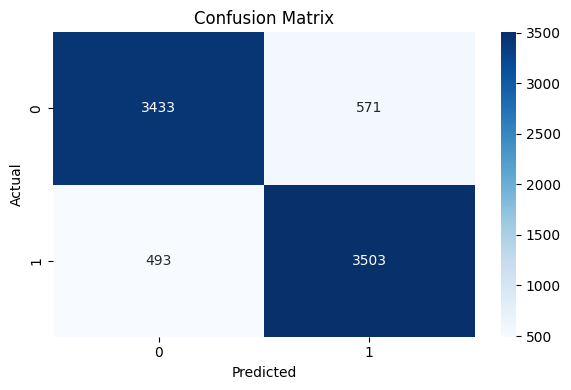

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Function to select non-redundant, high-performing models
def select_top_models(model_set, X_val, y_val, threshold=0.01):
    """
    Select top non-redundant models that add value based on validation accuracy.
    """
    selected_models = []
    selected_preds = []

    for model in model_set:
        preds = model.predict(X_val)

        # Flatten output
        if hasattr(preds, "logits"):  # BERT (shouldn't happen here)
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy()
        else:
            preds = preds.reshape(-1)

        preds_binary = (preds >= 0.5).astype(int)
        acc = accuracy_score(y_val, preds_binary)

        if not selected_preds:
            selected_models.append(model)
            selected_preds.append(preds_binary)
        else:
            avg_preds_before = np.mean(selected_preds, axis=0)
            avg_preds_after = np.mean(selected_preds + [preds_binary], axis=0)

            acc_before = accuracy_score(y_val, (avg_preds_before >= 0.5).astype(int))
            acc_after = accuracy_score(y_val, (avg_preds_after >= 0.5).astype(int))

            if (acc_after - acc_before) >= threshold:
                selected_models.append(model)
                selected_preds.append(preds_binary)

    return selected_models
    
# 🧩 Define weights
bert_weights = [3, 5]  # BERT[0], BERT[1]
gru_weight = 3
flatten_weight = 1
lstm_weight = 1

# ✅ Replace these with your selected models
selected_flatten_models = select_top_models(flatten_models, X_val, y_val)
selected_lstm_models    = select_top_models(lstm_models, X_val, y_val)
selected_gru_models     = select_top_models(gru_models, X_val, y_val)
selected_bert_models = [bert_models[0], bert_models[1]]  # Only BERT[0] and BERT[1]

# 🔁 Weighted prediction function
def get_weighted_predictions(models, X, weights=None, is_bert=False):
    predictions = []
    for i, model in enumerate(models):
        preds = model.predict(X)
        if is_bert:
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy().reshape(-1, 1)
        else:
            preds = preds.reshape(-1, 1)
        weight = weights[i] if weights else 1
        predictions.append(preds * weight)
    return np.hstack(predictions) if predictions else np.array([])

# 📌 Meta-features for training (validation set)
flatten_val_preds = get_weighted_predictions(selected_flatten_models, X_val, weights=[flatten_weight]*len(selected_flatten_models))
lstm_val_preds    = get_weighted_predictions(selected_lstm_models, X_val, weights=[lstm_weight]*len(selected_lstm_models))
gru_val_preds     = get_weighted_predictions(selected_gru_models, X_val, weights=[gru_weight]*len(selected_gru_models))
bert_val_preds    = get_weighted_predictions(selected_bert_models, X_val, weights=bert_weights, is_bert=True)

X_meta_train = np.hstack([flatten_val_preds, lstm_val_preds, gru_val_preds, bert_val_preds])

# 📌 Meta-features for testing (test set)
flatten_test_preds = get_weighted_predictions(selected_flatten_models, X_test, weights=[flatten_weight]*len(selected_flatten_models))
lstm_test_preds    = get_weighted_predictions(selected_lstm_models, X_test, weights=[lstm_weight]*len(selected_lstm_models))
gru_test_preds     = get_weighted_predictions(selected_gru_models, X_test, weights=[gru_weight]*len(selected_gru_models))
bert_test_preds    = get_weighted_predictions(selected_bert_models, X_test, weights=bert_weights, is_bert=True)

X_meta_test = np.hstack([flatten_test_preds, lstm_test_preds, gru_test_preds, bert_test_preds])

# 🔄 Standardization
scaler = StandardScaler()
X_meta_train = scaler.fit_transform(X_meta_train)
X_meta_test = scaler.transform(X_meta_test)

# 🧠 Meta learner model
meta_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_meta_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
meta_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# 🚂 Train
meta_model.fit(
    X_meta_train, y_val,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🎯 Predict and Evaluate
meta_probs = meta_model.predict(X_meta_test).flatten()
meta_preds = (meta_probs >= 0.5).astype(int)

acc = accuracy_score(y_test, meta_preds)
print(f"\n✅ Accuracy with Weighted Stacking (Selected Models): {acc:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, meta_preds))

cm = confusion_matrix(y_test, meta_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 10. Stacking with SVM

In [14]:
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Function to select best non-redundant models based on accuracy and diversity
def select_top_models(model_set, X_val, y_val, threshold=0.01):
    selected_models = []
    selected_preds = []

    for model in model_set:
        preds = model.predict(X_val)
        if hasattr(preds, "logits"):  # BERT-style
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy()
        else:
            preds = preds.reshape(-1)

        preds_binary = (preds >= 0.5).astype(int)
        acc = accuracy_score(y_val, preds_binary)

        if not selected_preds:
            selected_models.append(model)
            selected_preds.append(preds_binary)
        else:
            avg_preds_before = np.mean(selected_preds, axis=0)
            avg_preds_after = np.mean(selected_preds + [preds_binary], axis=0)

            acc_before = accuracy_score(y_val, (avg_preds_before >= 0.5).astype(int))
            acc_after = accuracy_score(y_val, (avg_preds_after >= 0.5).astype(int))

            if (acc_after - acc_before) >= threshold:
                selected_models.append(model)
                selected_preds.append(preds_binary)

    return selected_models

# Select best models
selected_flatten_models = select_top_models(flatten_models, X_val, y_val)
selected_lstm_models    = select_top_models(lstm_models, X_val, y_val)
selected_gru_models     = select_top_models(gru_models, X_val, y_val)
selected_bert_models    = [bert_models[2], bert_models[1]]  # Keep only best 2 BERTs

# Function to get weighted predictions from base models
def get_predictions(models, X, is_bert=False, duplication_factor=1):
    predictions = []
    for model in models:
        preds = model.predict(X)
        if is_bert:
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy().reshape(-1, 1)
        else:
            preds = preds.reshape(-1, 1)
        for _ in range(duplication_factor):
            predictions.append(preds)
    return np.hstack(predictions) if predictions else np.array([])

# Generate meta-training features
flatten_val_preds = get_predictions(selected_flatten_models, X_val, duplication_factor=1)
lstm_val_preds    = get_predictions(selected_lstm_models, X_val, duplication_factor=1)
gru_val_preds     = get_predictions(selected_gru_models, X_val, duplication_factor=3)  # Higher weight
bert_val_preds    = get_predictions(selected_bert_models, X_val, is_bert=True, duplication_factor=5)  # Highest weight

X_meta_train = np.hstack([flatten_val_preds, lstm_val_preds, gru_val_preds, bert_val_preds])

# Generate meta-test features
flatten_test_preds = get_predictions(selected_flatten_models, X_test, duplication_factor=1)
lstm_test_preds    = get_predictions(selected_lstm_models, X_test, duplication_factor=1)
gru_test_preds     = get_predictions(selected_gru_models, X_test, duplication_factor=3)
bert_test_preds    = get_predictions(selected_bert_models, X_test, is_bert=True, duplication_factor=5)

X_meta_test = np.hstack([flatten_test_preds, lstm_test_preds, gru_test_preds, bert_test_preds])

# Scale the meta features
scaler = StandardScaler()
X_meta_train = scaler.fit_transform(X_meta_train)
X_meta_test = scaler.transform(X_meta_test)

# Perform Grid Search for best SVM hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100, 500],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.001, 0.01, 'scale', 'auto'],
    'degree': [2, 3, 4]  # applicable for 'poly'
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_meta_train, y_val)

# Evaluate final stacked model
best_svm = grid.best_estimator_
stacking_preds = best_svm.predict(X_meta_test)
stacking_acc = accuracy_score(y_test, stacking_preds)

print(f"✅ Optimized Stacking Accuracy using SVM: {stacking_acc:.4f}")
print(f"🔍 Best Parameters: {grid.best_params_}")


250/250 [==============================] - 28s 112ms/step
✅ Optimized Stacking Accuracy using SVM: 0.8684
🔍 Best Parameters: {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'sigmoid'}


# 11. Stacking with Random Forest

250/250 [==============================] - 28s 112ms/step
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Accuracy (All Models Stacking + GridSearch RF): 0.8666
🧠 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4004
           1       0.86      0.87      0.87      3996

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



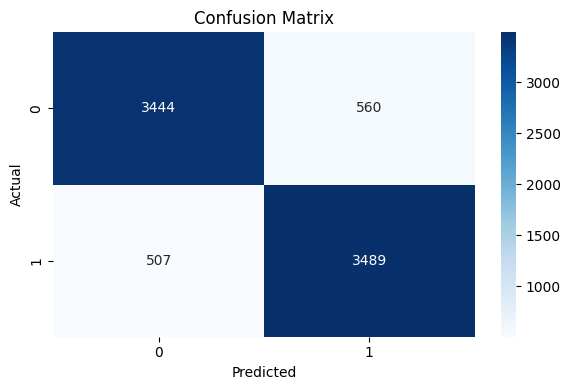

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
<ipython-input-13-7a53acabec72>:105: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


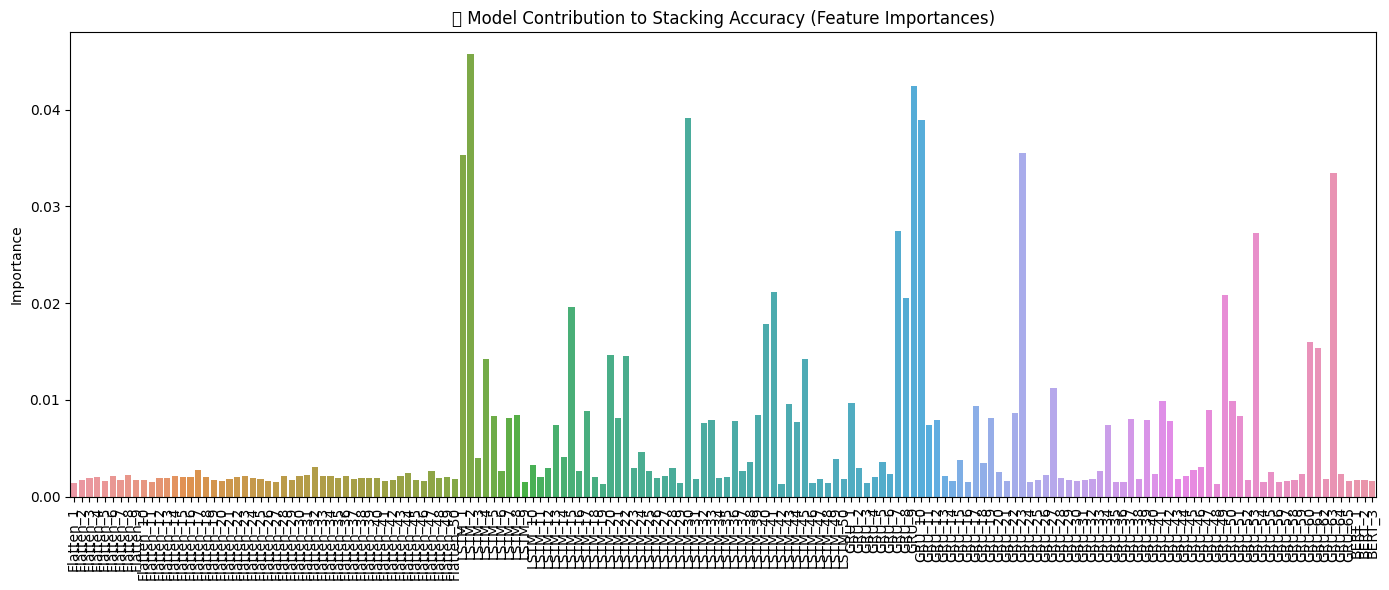


📌 Selected Models for next stacking iteration:
['LSTM_1', 'LSTM_2', 'LSTM_4', 'LSTM_5', 'LSTM_7', 'LSTM_8', 'LSTM_15', 'LSTM_17', 'LSTM_20', 'LSTM_21', 'LSTM_22', 'LSTM_30', 'LSTM_33', 'LSTM_36', 'LSTM_39', 'LSTM_40', 'LSTM_41', 'LSTM_43', 'LSTM_45', 'GRU_1', 'GRU_7', 'GRU_8', 'GRU_9', 'GRU_10', 'GRU_12', 'GRU_17', 'GRU_19', 'GRU_22', 'GRU_23', 'GRU_27', 'GRU_37', 'GRU_39', 'GRU_41', 'GRU_42', 'GRU_47', 'GRU_49', 'GRU_50', 'GRU_51', 'GRU_53', 'GRU_60', 'GRU_61', 'GRU_63', 'BERT_1', 'BERT_2']
250/250 [==============================] - 28s 112ms/step
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Accuracy (Weighted Filtered Stacking): 0.8828
🧠 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [13]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🧩 Use all models
selected_flatten_models = flatten_models
selected_lstm_models = lstm_models
selected_gru_models = gru_models
selected_bert_models = bert_models

# 📌 Weighted prediction function
def get_weighted_predictions(models, X, is_bert=False):
    predictions = []
    for model in models:
        preds = model.predict(X)
        if is_bert:
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy().reshape(-1, 1)
        else:
            preds = preds.reshape(-1, 1)
        predictions.append(preds)
    return np.hstack(predictions)

# 🧠 Generate meta features (train)
flatten_val_preds = get_weighted_predictions(selected_flatten_models, X_val)
lstm_val_preds = get_weighted_predictions(selected_lstm_models, X_val)
gru_val_preds = get_weighted_predictions(selected_gru_models, X_val)
bert_val_preds = get_weighted_predictions(selected_bert_models, X_val, is_bert=True)

X_meta_train = np.hstack([flatten_val_preds, lstm_val_preds, gru_val_preds, bert_val_preds])

# 🧠 Generate meta features (test)
flatten_test_preds = get_weighted_predictions(selected_flatten_models, X_test)
lstm_test_preds = get_weighted_predictions(selected_lstm_models, X_test)
gru_test_preds = get_weighted_predictions(selected_gru_models, X_test)
bert_test_preds = get_weighted_predictions(selected_bert_models, X_test, is_bert=True)

X_meta_test = np.hstack([flatten_test_preds, lstm_test_preds, gru_test_preds, bert_test_preds])

# 🔄 Scale features
scaler = StandardScaler()
X_meta_train = scaler.fit_transform(X_meta_train)
X_meta_test = scaler.transform(X_meta_test)

# 🔍 Grid Search over Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 14],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_meta_train, y_val)

# ✅ Final evaluation
best_rf = grid.best_estimator_
meta_preds = best_rf.predict(X_meta_test)

acc = accuracy_score(y_test, meta_preds)
print(f"\n✅ Accuracy (All Models Stacking + GridSearch RF): {acc:.4f}")
print("🧠 Best Parameters:", grid.best_params_)

print("\n📊 Classification Report:")
print(classification_report(y_test, meta_preds))

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, meta_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📈 Model Contribution Plot
model_labels = (
    [f"Flatten_{i+1}" for i in range(len(selected_flatten_models))] +
    [f"LSTM_{i+1}" for i in range(len(selected_lstm_models))] +
    [f"GRU_{i+1}" for i in range(len(selected_gru_models))] +
    [f"BERT_{i+1}" for i in range(len(selected_bert_models))]
)

importances = best_rf.feature_importances_
plt.figure(figsize=(14, 6))
sns.barplot(x=model_labels, y=importances)
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.title("🔍 Model Contribution to Stacking Accuracy (Feature Importances)")
plt.tight_layout()
plt.show()

# ✅ Store spiked model names
importance_df = pd.DataFrame({'model': model_labels, 'importance': importances})
threshold = importance_df["importance"].quantile(0.75)  # top 25%
spiked_models_df = importance_df[importance_df["importance"] >= threshold]

# Always include BERT_1 and BERT_2
for name in ['BERT_1', 'BERT_2']:
    if name not in spiked_models_df["model"].values:
        spiked_models_df = pd.concat([spiked_models_df, importance_df[importance_df["model"] == name]])

# 🔒 Final list of selected model names
selected_model_names = spiked_models_df["model"].tolist()
print("\n📌 Selected Models for next stacking iteration:")
print(selected_model_names)

# 🎯 Get indices by model type
def get_model_indices(model_type_prefix, model_names):
    return [int(name.split('_')[1]) - 1 for name in model_names if name.startswith(model_type_prefix)]

####flatten_indices = get_model_indices("Flatten", selected_model_names)
lstm_indices = get_model_indices("LSTM", selected_model_names)
gru_indices = get_model_indices("GRU", selected_model_names)
bert_indices = get_model_indices("BERT", selected_model_names)

# 🧩 Filtered models based on previous stacking importance
###filtered_flatten_models = [flatten_models[i] for i in flatten_indices]
filtered_lstm_models = [lstm_models[i] for i in lstm_indices]
filtered_gru_models = [gru_models[i] for i in gru_indices]
filtered_bert_models = [bert_models[i] for i in bert_indices]

# 🧠 Extract feature importances corresponding to selected models
### flatten_importance = importances[[i for i, name in enumerate(model_labels) if name in selected_model_names and name.startswith("Flatten")]]
lstm_importance = importances[[i for i, name in enumerate(model_labels) if name in selected_model_names and name.startswith("LSTM")]]
gru_importance = importances[[i for i, name in enumerate(model_labels) if name in selected_model_names and name.startswith("GRU")]]
bert_importance = importances[[i for i, name in enumerate(model_labels) if name in selected_model_names and name.startswith("BERT")]]

# 📌 Normalize importance weights
def normalize_weights(weights):
    return weights / np.sum(weights)

### flatten_weights = normalize_weights(flatten_importance)
lstm_weights = normalize_weights(lstm_importance)
gru_weights = normalize_weights(gru_importance)
bert_weights = normalize_weights(bert_importance)

# 🧠 Weighted prediction function
def get_weighted_predictions(models, weights, X, is_bert=False):
    predictions = []
    for i, model in enumerate(models):
        preds = model.predict(X)
        if is_bert:
            preds = tf.nn.softmax(preds.logits)[:, 1].numpy().reshape(-1, 1)
        else:
            preds = preds.reshape(-1, 1)
        weighted_preds = preds * weights[i]
        predictions.append(weighted_preds)
    return np.hstack(predictions)

# 🔄 Generate weighted meta features (train)
###flatten_val_preds = get_weighted_predictions(filtered_flatten_models, flatten_weights, X_val)
lstm_val_preds = get_weighted_predictions(filtered_lstm_models, lstm_weights, X_val)
gru_val_preds = get_weighted_predictions(filtered_gru_models, gru_weights, X_val)
bert_val_preds = get_weighted_predictions(filtered_bert_models, bert_weights, X_val, is_bert=True)

X_meta_train_filtered = np.hstack([lstm_val_preds, gru_val_preds, bert_val_preds])

# 🔄 Generate weighted meta features (test)
###flatten_test_preds = get_weighted_predictions(filtered_flatten_models, flatten_weights, X_test)
lstm_test_preds = get_weighted_predictions(filtered_lstm_models, lstm_weights, X_test)
gru_test_preds = get_weighted_predictions(filtered_gru_models, gru_weights, X_test)
bert_test_preds = get_weighted_predictions(filtered_bert_models, bert_weights, X_test, is_bert=True)

X_meta_test_filtered = np.hstack([lstm_test_preds, gru_test_preds, bert_test_preds])

# 🎯 Standardize
scaler = StandardScaler()
X_meta_train_filtered = scaler.fit_transform(X_meta_train_filtered)
X_meta_test_filtered = scaler.transform(X_meta_test_filtered)
feature_weight = np.mean([0.0065, 0.0065]) * 2

# 🔍 Grid Search
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_meta_train_filtered, y_val)

# ✅ Final evaluation
best_rf_filtered = grid.best_estimator_
meta_preds_filtered = best_rf_filtered.predict(X_meta_test_filtered)

acc = accuracy_score(y_test, meta_preds_filtered)
print(f"\n✅ Accuracy (Weighted Filtered Stacking): {acc:.4f}")
print("🧠 Best Parameters:", grid.best_params_)

# 12. SHAP and LIME Explaination

In [14]:
import numpy as np
import pandas as pd
import joblib

# ✅ 1. Save meta features & labels
np.save('/kaggle/working/X_meta_train_filtered.npy', X_meta_train_filtered)
np.save('/kaggle/working/X_meta_test_filtered.npy', X_meta_test_filtered)
np.save('/kaggle/working/y_val.npy', y_val)
np.save('/kaggle/working/y_test.npy', y_test)

# ✅ 2. Save trained random forest model
joblib.dump(best_rf_filtered, '/kaggle/working/best_rf_filtered_model.pkl')

# ✅ 3. Save feature names for SHAP/LIME
feature_names = (
    [f"LSTM_{i+1}" for i in lstm_indices] +
    [f"GRU_{i+1}" for i in gru_indices] +
    [f"BERT_{i+1}" for i in bert_indices]
)
pd.Series(feature_names).to_csv("/kaggle/working/meta_feature_names.csv", index=False)

print("✅ All files saved successfully!")

✅ All files saved successfully!


In [17]:
# Load everything
X_test = np.load('/kaggle/working/X_meta_test_filtered.npy')
y_test = np.load('/kaggle/working/y_test.npy')
feature_names = pd.read_csv("/kaggle/working/meta_feature_names.csv", header=None)[0].tolist()
model = joblib.load('/kaggle/working/best_rf_filtered_model.pkl')

`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.


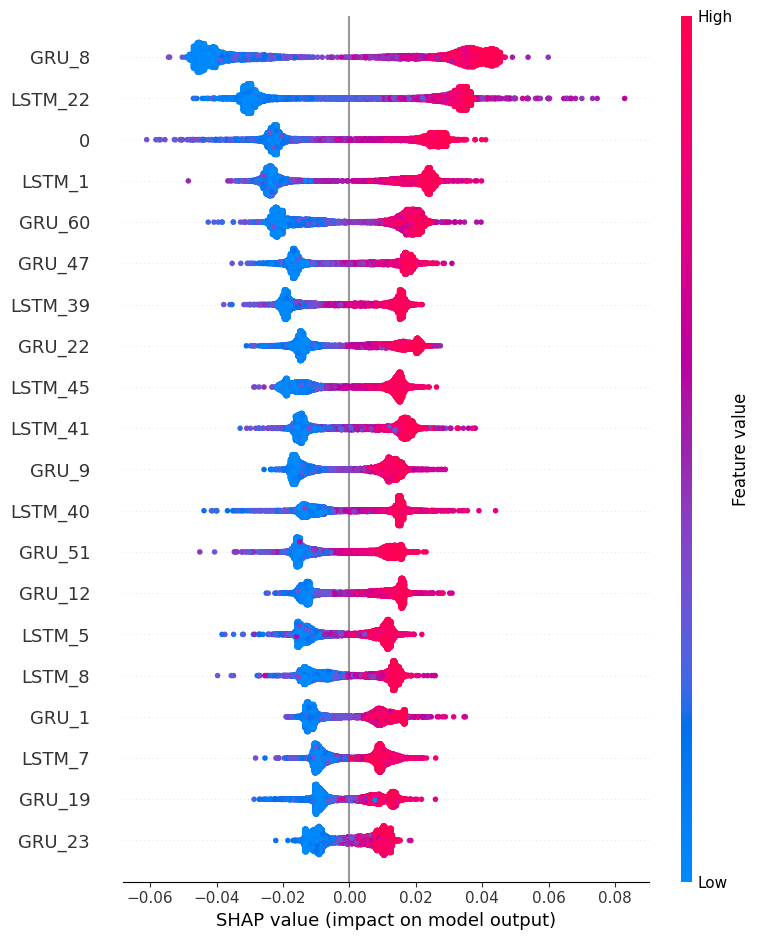

In [18]:
import shap
shap.initjs()

explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names)

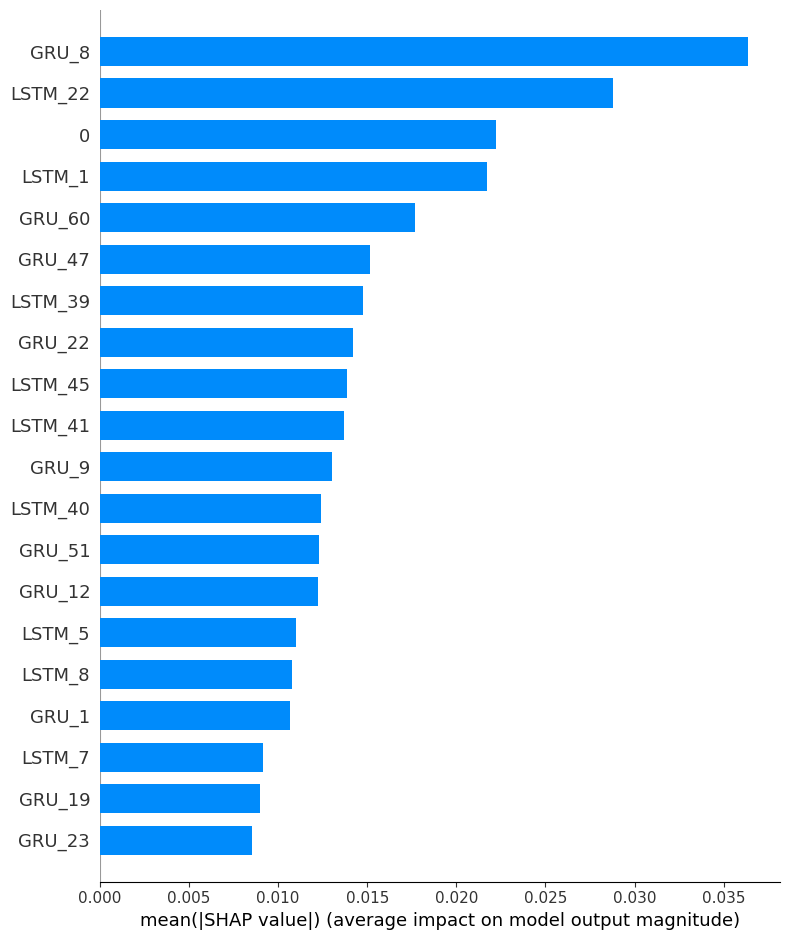

In [24]:
shap.summary_plot(shap_values[0], X_test, feature_names=feature_names, plot_type="bar")

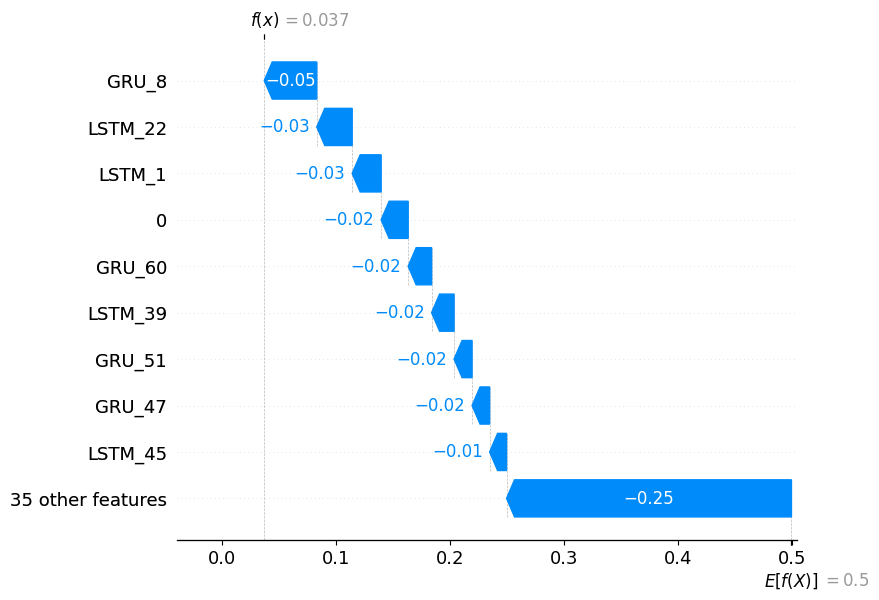

In [28]:
shap.plots._waterfall.waterfall_legacy(
    explainer_shap.expected_value[1],
    shap_values[1][i],
    feature_names=feature_names
)

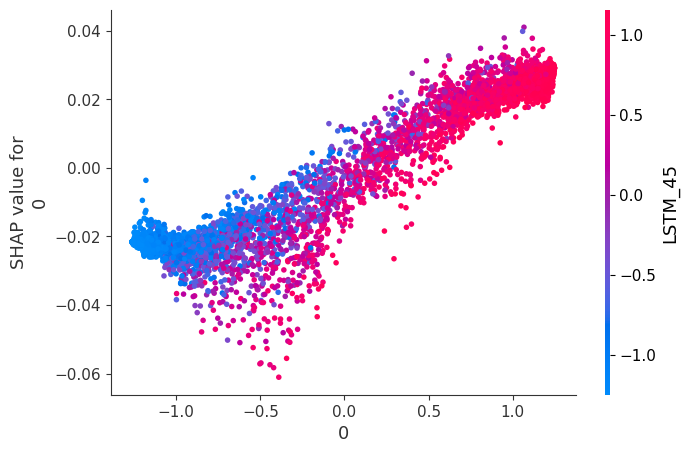

In [30]:
shap.dependence_plot(
    ind=feature_names[0],  # x-axis feature
    shap_values=shap_values[1],
    features=X_test,
    feature_names=feature_names
)

In [20]:
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data=X_test,
    feature_names=feature_names,
    class_names=["Negative", "Positive"],
    mode='classification'
)

idx = 10  # Or any row number
exp = explainer_lime.explain_instance(X_test[idx], model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

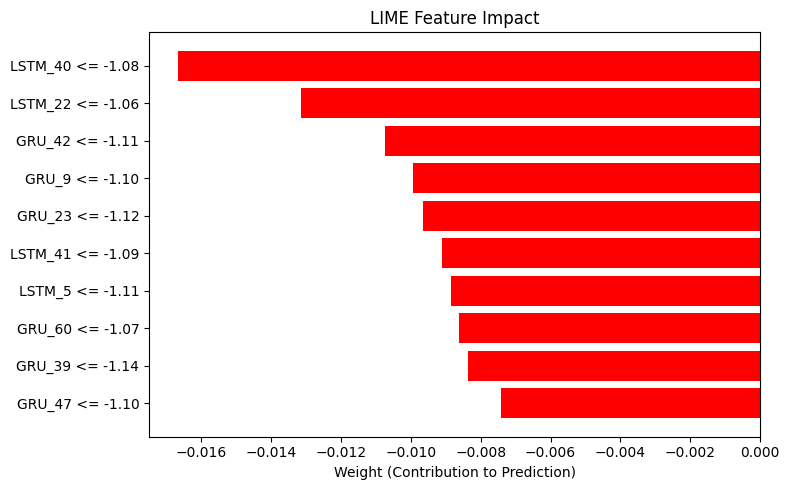

In [32]:
import matplotlib.pyplot as plt

def plot_lime_bar(exp, title="LIME Feature Impact"):
    fig, ax = plt.subplots(figsize=(8, 5))
    features, weights = zip(*exp.as_list())
    colors = ['green' if w > 0 else 'red' for w in weights]

    ax.barh(range(len(weights)), weights, color=colors)
    ax.set_yticks(range(len(weights)))
    ax.set_yticklabels(features)
    ax.invert_yaxis()
    ax.set_title(title)
    ax.set_xlabel("Weight (Contribution to Prediction)")
    plt.tight_layout()
    plt.show()

# Usage:
plot_lime_bar(exp)

In [33]:
import pandas as pd

lime_df = pd.DataFrame(exp.as_list(), columns=["Feature", "Weight"])
lime_df["Effect"] = lime_df["Weight"].apply(lambda x: "Supports" if x > 0 else "Contradicts")
display(lime_df)

,Feature,Weight,Effect
0,LSTM_40 <= -1.08,-0.016652,Contradicts
1,LSTM_22 <= -1.06,-0.013142,Contradicts
2,GRU_42 <= -1.11,-0.010743,Contradicts
3,GRU_9 <= -1.10,-0.009924,Contradicts
4,GRU_23 <= -1.12,-0.009650,Contradicts
5,LSTM_41 <= -1.09,-0.009116,Contradicts
6,LSTM_5 <= -1.11,-0.008853,Contradicts
7,GRU_60 <= -1.07,-0.008620,Contradicts
8,GRU_39 <= -1.14,-0.008349,Contradicts
9,GRU_47 <= -1.10,-0.007423,Contradicts
